Renko Chart

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# for interactive charts, change to 'default'
# or use any method available in 'plotly renderers wiki'
render = 'png'

In [2]:
import pandas as pd

df_ticks = pd.read_parquet(f"data/US30_T1_2025_cT.parquet")
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

df_ticks.head()
len(df_ticks)

,ask,close,spread
datetime,,,
2025-05-15 00:00:00.650,41839.4,41838.3,1.1
2025-05-15 00:00:01.002,41839.8,41838.7,1.1
2025-05-15 00:00:01.252,41840.2,41839.1,1.1
2025-05-15 00:00:01.405,41840.9,41839.8,1.1
2025-05-15 00:00:01.658,41840.6,41839.5,1.1


180399

In [3]:
from renkodf import Renko
r = Renko(df_ticks, brick_size=14)
df_ohlc = r.renko_df()
df_ohlc.head()
len(df_ohlc)

,open,high,low,close,volume
datetime,,,,,
2025-05-15 00:05:27.516,41846.0,41860.0,41843.8,41860.0,153.0
2025-05-15 00:31:36.242,41860.0,41874.0,41851.5,41874.0,666.0
2025-05-15 00:43:07.916,41874.0,41888.0,41865.8,41888.0,259.0
2025-05-15 01:30:02.841,41874.0,41891.2,41860.0,41860.0,1170.0
2025-05-15 02:15:13.794,41860.0,41872.5,41846.0,41846.0,988.0


407

In [4]:
from order_flow_aggregated import OrderFlowAggregated
odft = OrderFlowAggregated(df_ohlc, df_ticks, 7, is_open_time=False)

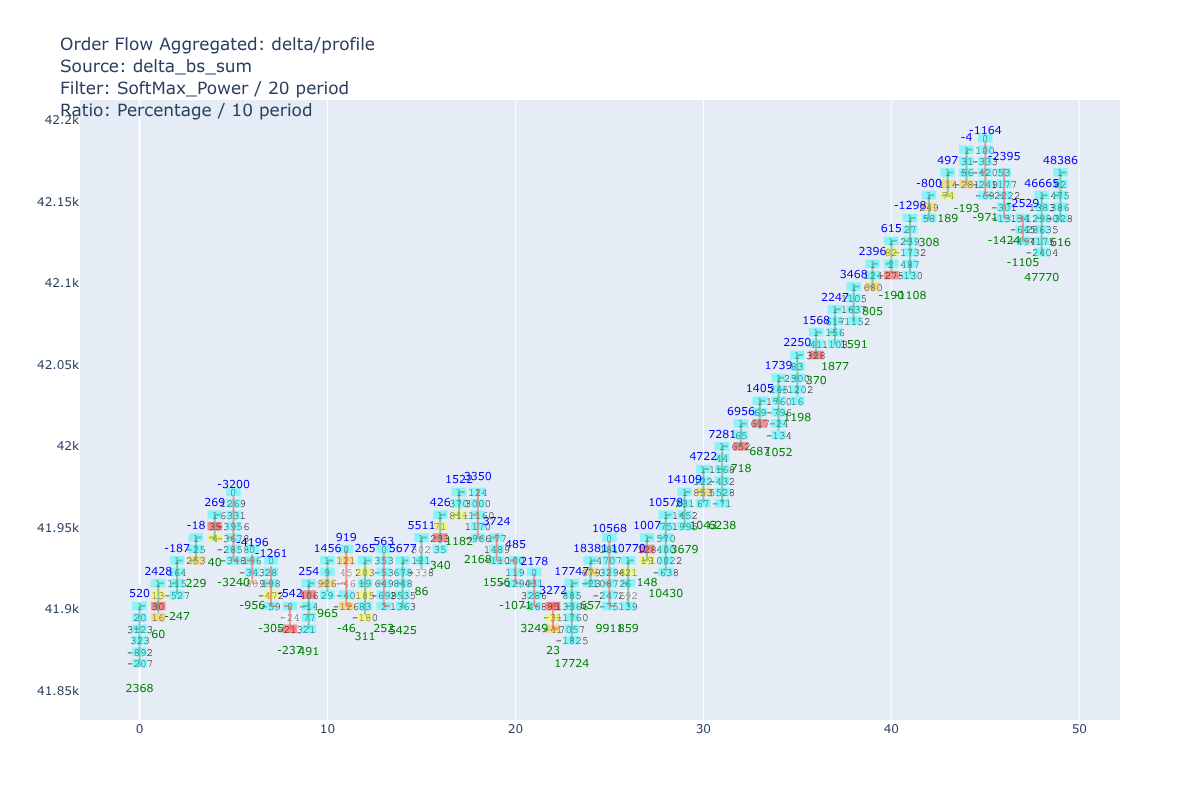

In [5]:
from order_flow_aggregated import SpikePlot
plot_params = SpikePlot(spike_chart=True)
odft.plot([100, 150], mode='delta', chart='ohlc', spike_plot=plot_params, renderer=render)

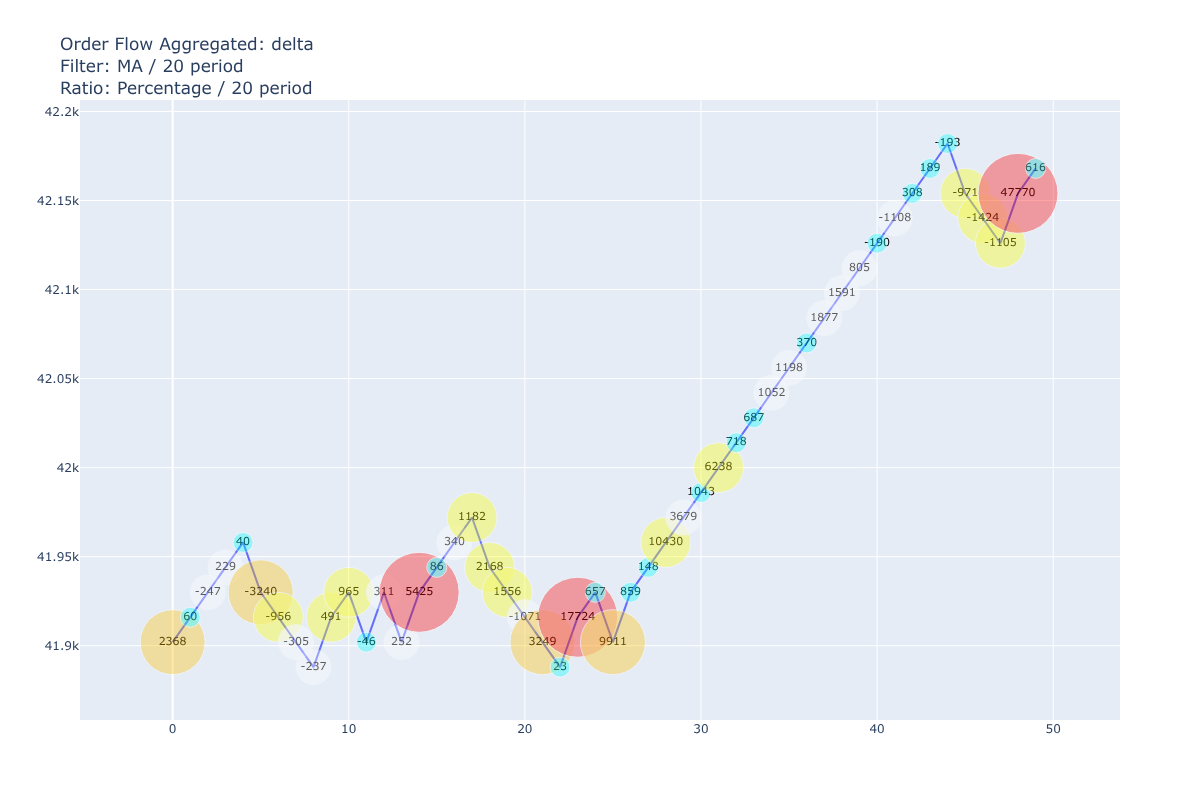

In [6]:
odft.plot_bubbles([100, 150], 'delta', 'heatmap', renderer=render)

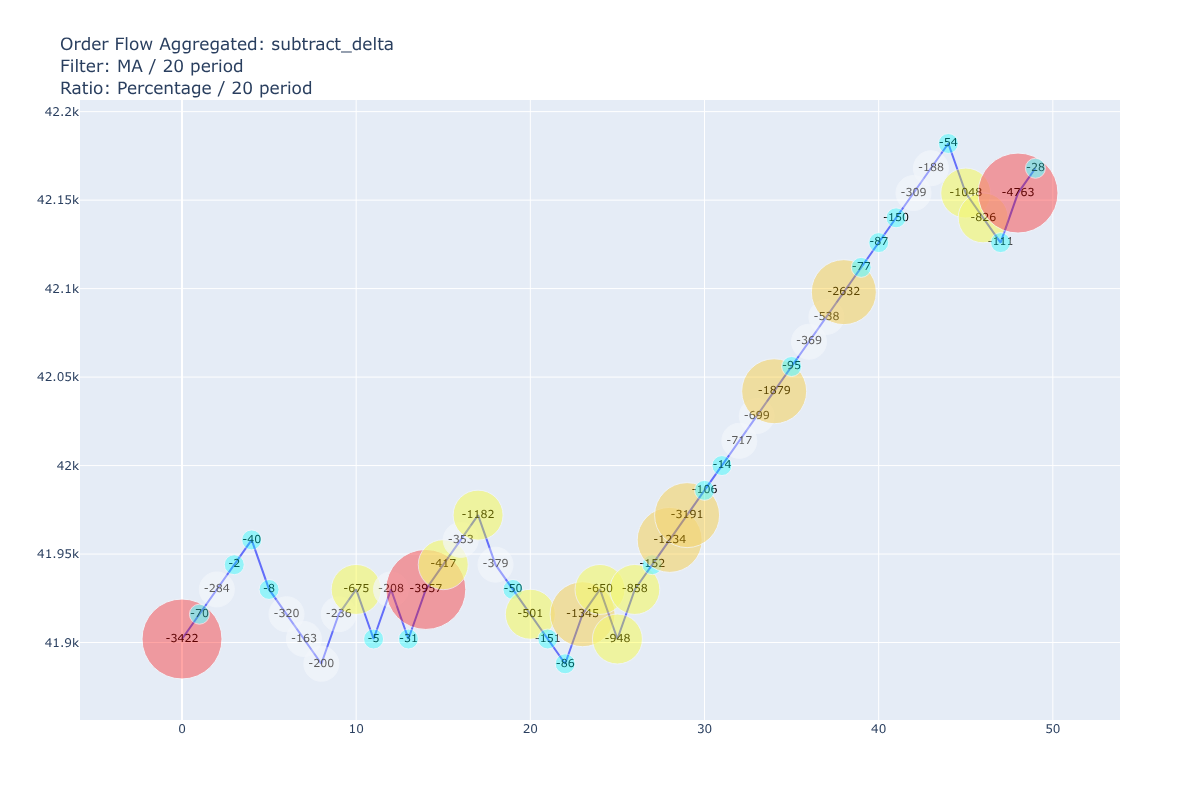

In [7]:
odft.plot_bubbles([100, 150], 'subtract', 'heatmap', renderer=render)
# other sources ['sum', bs_sum']

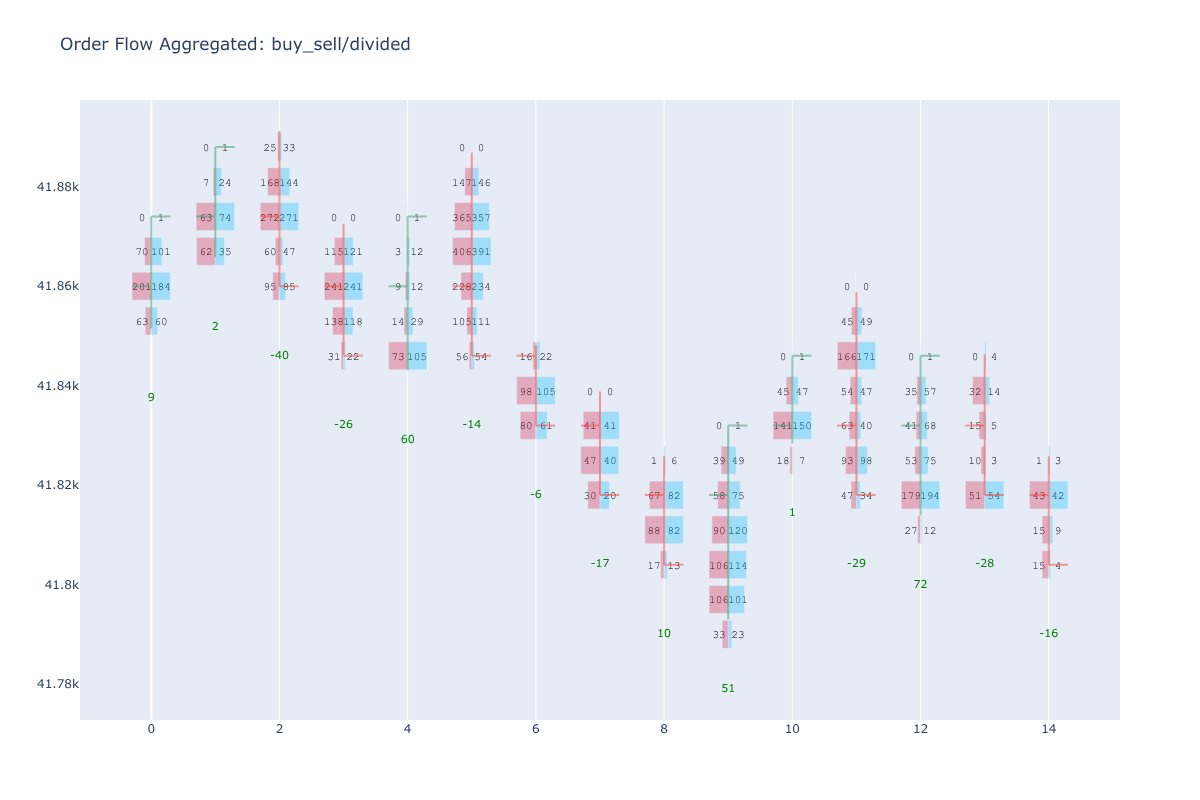

In [8]:
odft.plot(mode='buy_sell', view='divided', chart='ohlc', renderer=render)

WARNING	Thread(Thread-20 (run)) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


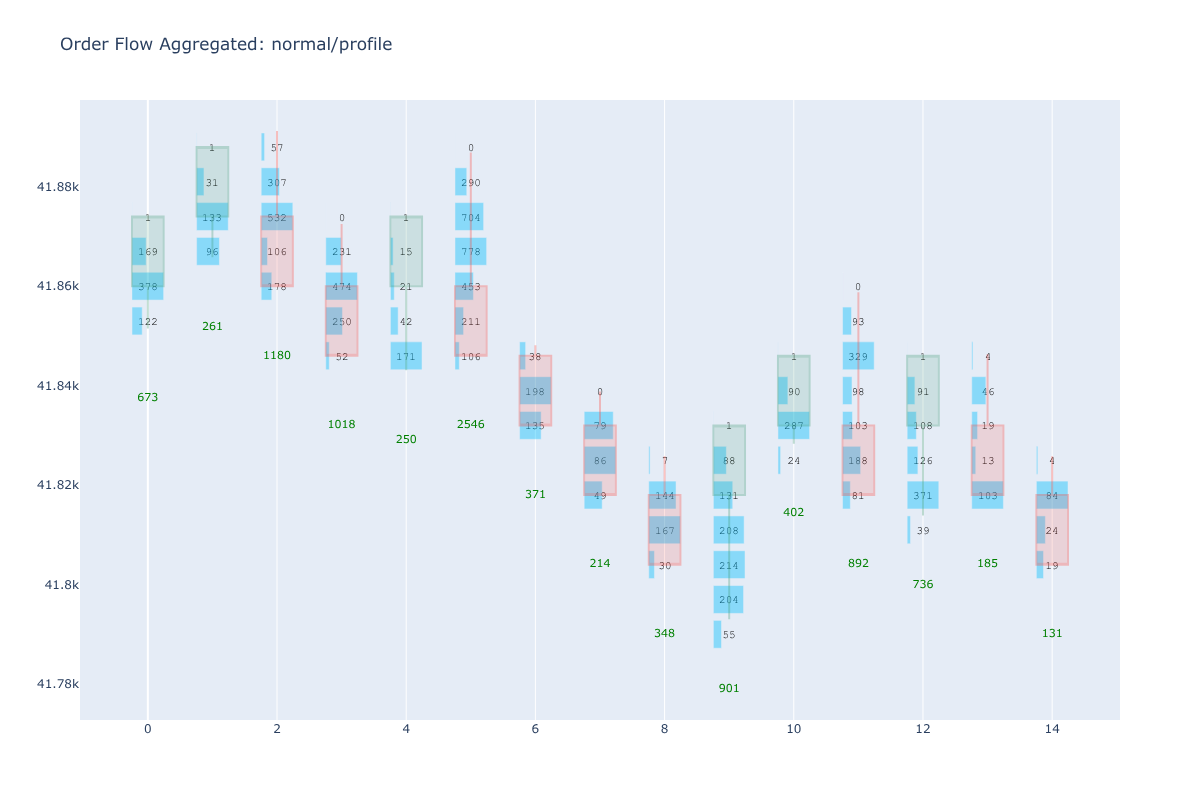

In [9]:
odft.plot(mode='normal', chart='candle', renderer=render)

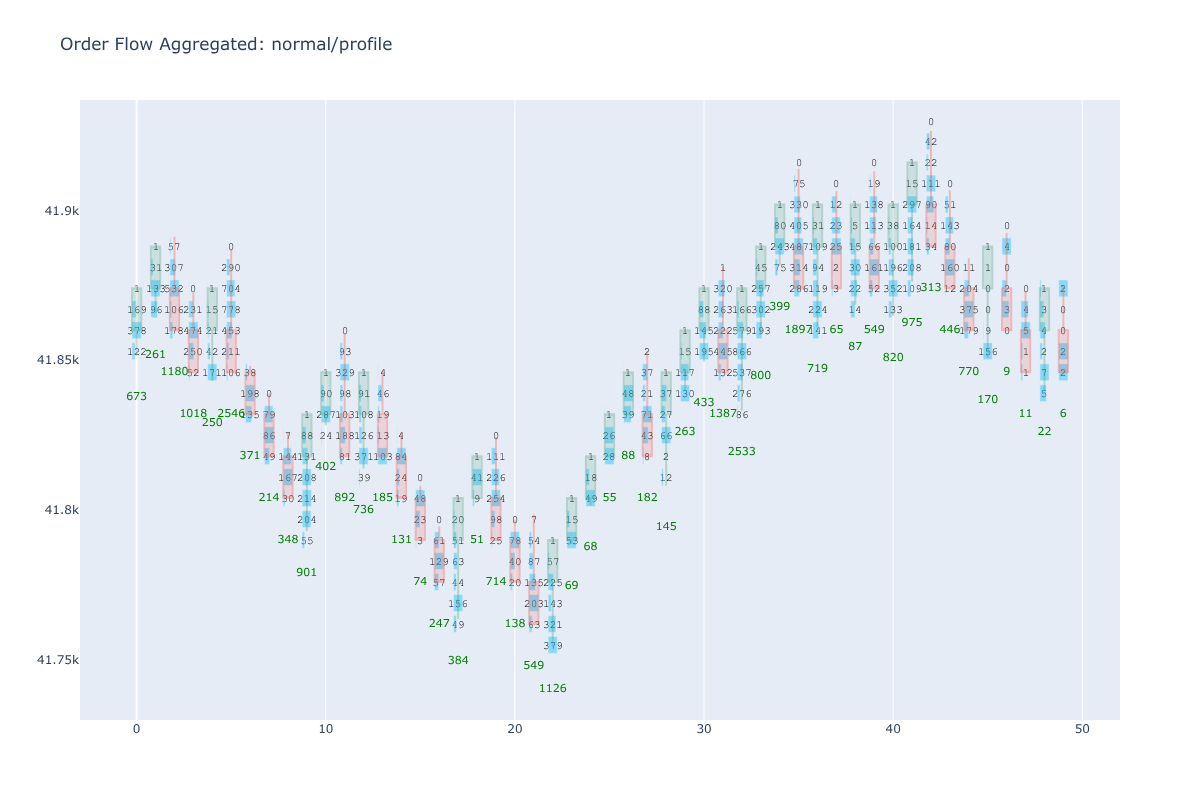

In [10]:
odft.plot(iloc_value=50, mode='normal', chart='candle', renderer=render)